In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
x, y = datasets.make_blobs(n_samples = 100, centers = 3, cluster_std = 1.2)
df = pd.DataFrame(x, columns = ['x0', 'x1'])
df.head()

,x0,x1
0,7.371619,10.790781
1,-5.444377,-4.733967
2,-8.287004,-4.385798
3,8.730925,8.207694
4,-6.526940,-2.892775


In [19]:
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

class KM:
    def __init__(self, epochs):
        self.epochs = epochs
        
    def fit(self, X):
        self.df = X.copy()

        clusters = np.random.uniform(-5, 5, size=(3,2))
        clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
        clusters["label"] = ["o", "+", "x"]
        self.clusters = clusters
        self.labels = list(self.clusters["label"])

        for i in range(self.epochs):
            self.assign_points()
            self.update_centers()

    def plot(self):
        ax = km_scatter(self.df, s=100, c="0.7")
        km_scatter(self.clusters, s=200, c="red", ax=ax)
        
    # centroids => points (df)
    def assign_points(self):
        for cluster in self.clusters.itertuples():
            x0_diff = df["x0"] - cluster.x0
            x1_diff = df["x1"] - cluster.x1
            dist = (x0_diff**2 + x1_diff**2) ** 0.5
            self.df[cluster.label] = dist
        self.df["label"] = km.df[km.labels].idxmin(axis=1)
        return self
    
    # centroids => points
    def update_centers(self):
        clusters = km.df.groupby("label").mean()
        self.clusters = clusters[["x0", "x1"]].reset_index()
        return self
    

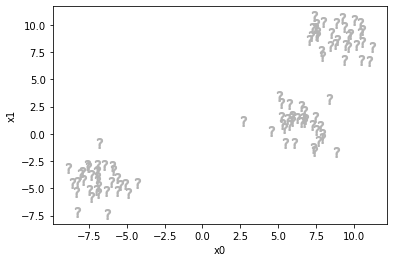

In [18]:
ax = km_scatter(df, s =100, c = '0.7')

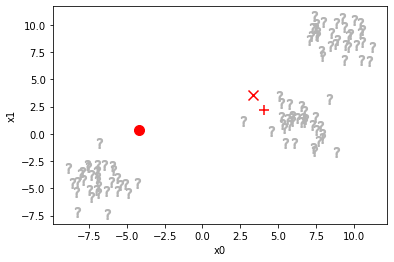

In [17]:
clusters = np.random.uniform(-5, 5, size=(3, 2))
clusters = pd.DataFrame(clusters, columns=['x0', 'x1'])
clusters['label'] = ['o', '+', 'x']

ax = km_scatter(df, s=100, c = '0.7')
km_scatter(clusters, s=100, c = 'red', ax = ax)

In [20]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2)
df = pd.DataFrame(x, columns=["x0", "x1"])

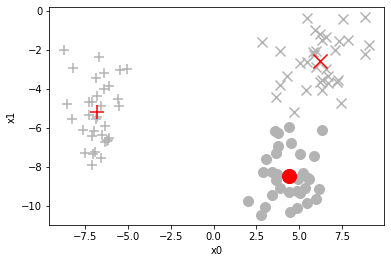

In [26]:
km = KM(20)
km.fit(df)
km.plot()

In [27]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2)
df = pd.DataFrame(x, columns=["x0", "x1"])

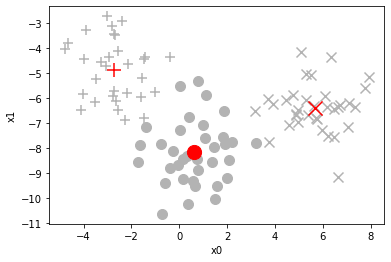

In [34]:
km = KM(20)
km.fit(df)
km.plot()

In [49]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2)
df = pd.DataFrame(x, columns=["x0", "x1"])

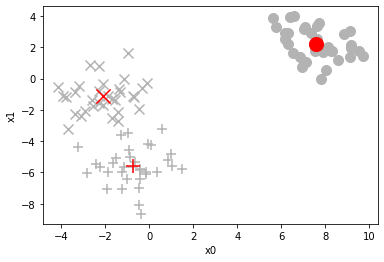

In [37]:
km = KM(20)
km.fit(df)
km.plot()

In [50]:
km = KMeans(n_clusters = 3)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
km.transform(df)

array([[ 3.12447053, 19.67002337, 21.64946123],
       [ 2.62494535, 23.66489627, 25.33641191],
       [22.27644337,  1.01952328,  6.87026255],
       [22.24026802,  1.4755527 ,  7.3913925 ],
       [ 2.4613225 , 20.90597603, 22.81932847],
       [21.92171358,  0.53870003,  6.50590816],
       [ 2.65868516, 19.1657085 , 20.38988765],
       [23.97754011,  6.04560828,  1.00404883],
       [ 1.58746854, 20.65514181, 22.2800396 ],
       [22.5054018 ,  5.30910167,  0.77546473],
       [22.28506239,  4.42506811,  1.61124086],
       [23.90932957,  6.7898156 ,  0.99245866],
       [22.53683777,  5.29512776,  0.77155078],
       [22.89468653,  1.79580531,  4.59451342],
       [23.14012343,  1.57734641,  6.82291227],
       [22.7822488 ,  1.5804978 ,  4.77554006],
       [ 1.97758274, 23.35874454, 24.88334571],
       [22.375883  ,  1.64721805,  7.52987439],
       [ 0.22637375, 21.62451031, 22.86710613],
       [21.96847533,  0.36653427,  6.29037989],
       [ 1.74936319, 23.49727664, 24.776

In [52]:
km.fit_predict(df)

array([1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1,
       2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1], dtype=int32)

In [53]:
df2 = df.copy()
df2['cluster'] = km.fit_predict(df2)
df2.tail()

,x0,x1,cluster
95,-6.649195,-11.029177,2
96,9.091821,7.651604,1
97,-7.660660,-9.978315,2
98,-6.379135,-9.722126,2
99,7.747500,7.998696,1


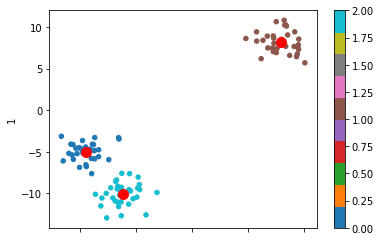

In [59]:
ax = df2.plot.scatter(x = 'x0', y = 'x1', c=df2['cluster'], cmap = 'tab10')
centroids = pd.DataFrame(km.cluster_centers_)
centroids.plot.scatter(x=0, y=1, c = 'red', s =100, ax = ax)

In [55]:
km.cluster_centers_

array([[ -9.43115017,  -4.97273495],
       [  7.88914844,   8.19732693],
       [ -6.20502178, -10.03425112]])

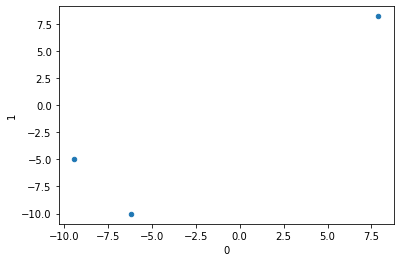

In [56]:
pd.DataFrame(km.cluster_centers_).plot.scatter(x=0, y=1)

In [60]:
km.inertia_

299.169453691399

Text(0, 0.5, 'avg squared dist to centroid')

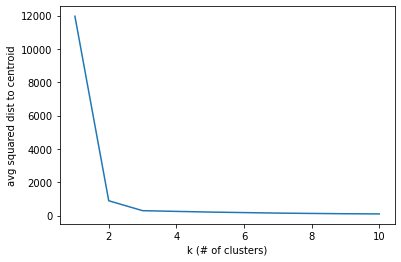

In [66]:
scores = pd.Series(dtype = float)
for k in range(1, 11):
    km = KMeans(n_clusters = k)
    km.fit(df)
    scores.loc[k] = km.inertia_
    
ax = scores.plot.line()
ax.set_xlabel('k (# of clusters)')
ax.set_ylabel('avg squared dist to centroid')

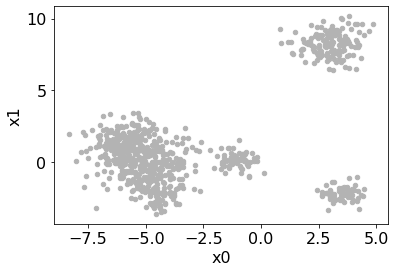

In [68]:
plt.rcParams["font.size"] = 16

coords1, _ = datasets.make_blobs(n_samples=300, centers=1, cluster_std=1)
coords2, _ = datasets.make_blobs(n_samples=300, centers=2, cluster_std=0.8)
coords3, _ = datasets.make_blobs(n_samples=200, centers=3, cluster_std=0.5)
df = pd.DataFrame(np.vstack((coords1, coords2, coords3)), columns=["x0", "x1"])
df.plot.scatter(x="x0", y="x1", c="0.7")

In [69]:
km = KMeans(n_clusters=4)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

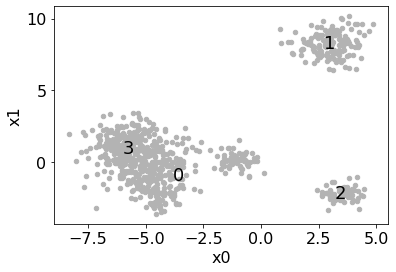

In [70]:
ax = df.plot.scatter(x="x0", y="x1", c="0.7")

for i in range(len(km.cluster_centers_)):
    x, y = km.cluster_centers_[i]
    ax.text(x, y, s=i, size=18,
            horizontalalignment="center",
            verticalalignment="center")

Text(0, 0.5, 'Points in Cluster')

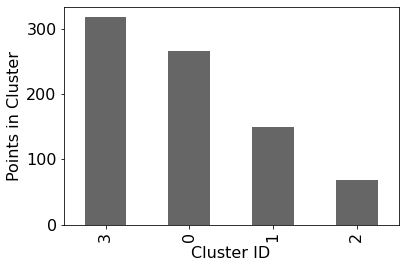

In [72]:
counts = pd.Series(km.predict(df)).value_counts()
ax = counts.plot.bar(color="0.4")
ax.set_xlabel("Cluster ID")
ax.set_ylabel("Points in Cluster")